<a href="https://colab.research.google.com/github/alishawalunj/stockMarketPredictor/blob/main/stockMarketPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

installation of yfinance library

In [1]:
pip install yfinance

In [2]:
import yfinance as yf

In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year - 20, end.month, end.day)

In [4]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512


In [7]:
google_data.shape

(5014, 6)

In [8]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5.014000e+03
mean,45.097133,45.573438,44.648443,45.121513,45.071431,1.158652e+08
std,43.134248,43.613236,42.717276,43.176634,43.131430,1.498485e+08
min,2.470490,2.534002,2.390042,2.490913,2.488082,1.584340e+05
25%,13.025365,13.141119,12.877295,13.021069,13.006269,2.736892e+07
50%,26.976686,27.184059,26.778728,26.984464,26.953792,5.636849e+07
75%,60.085376,60.586999,59.682126,60.244874,60.176394,1.425784e+08
max,191.750000,193.309998,190.619995,192.660004,192.660004,1.650833e+09


In [9]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5014 entries, 2004-08-19 to 2024-07-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5014 non-null   float64
 1   High       5014 non-null   float64
 2   Low        5014 non-null   float64
 3   Close      5014 non-null   float64
 4   Adj Close  5014 non-null   float64
 5   Volume     5014 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 274.2 KB


In [10]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

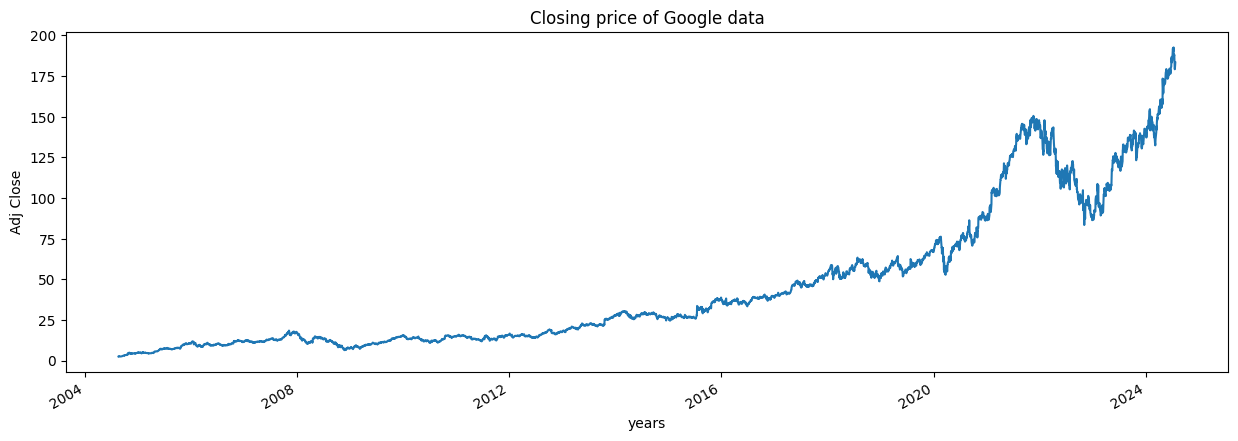

In [13]:
plt.figure(figsize=(15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [14]:
def plot_graph(figsize, values, column_name):
  plt.figure(figsize=figsize)
  values.plot()
  plt.xlabel("years")
  plt.ylabel(column_name)
  plt.title(f"{column_name} of Google data")

In [15]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

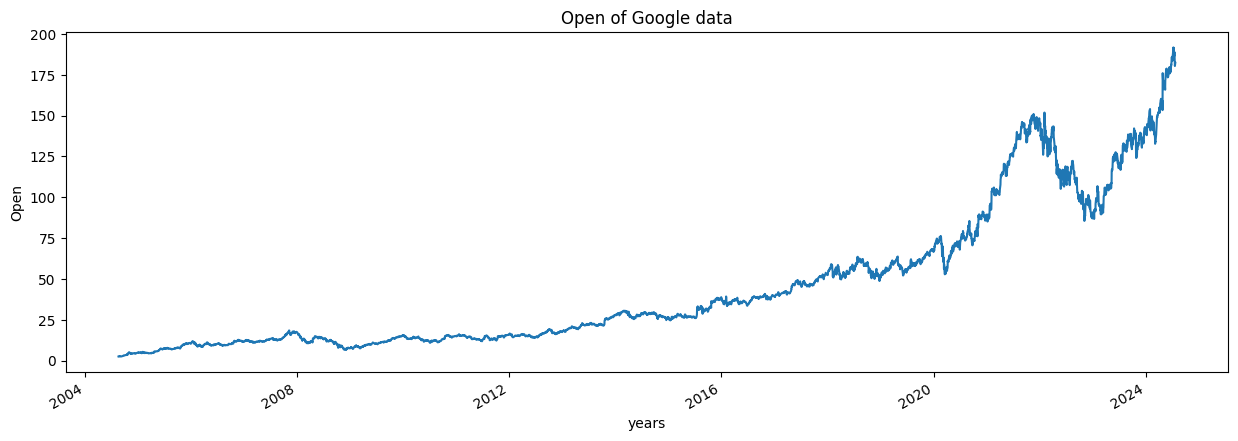

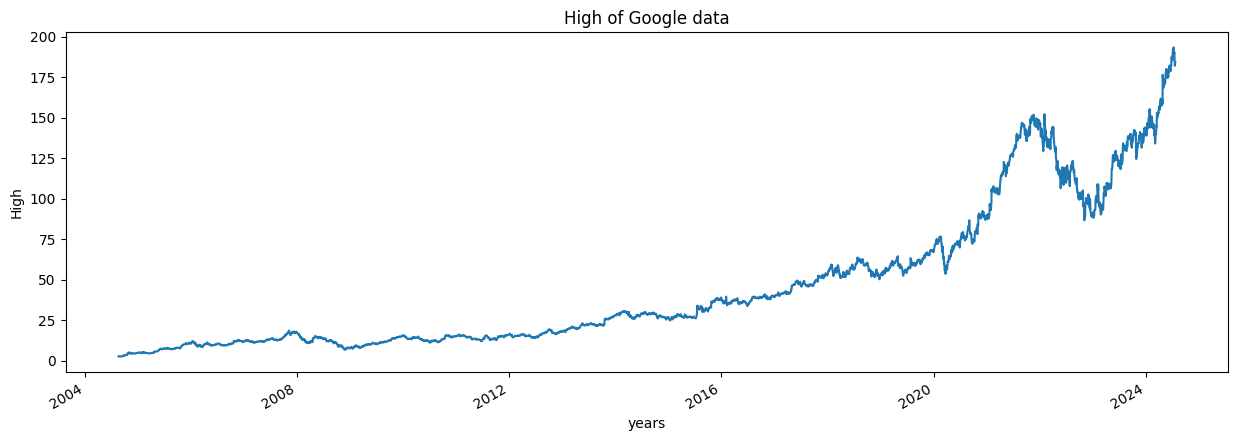

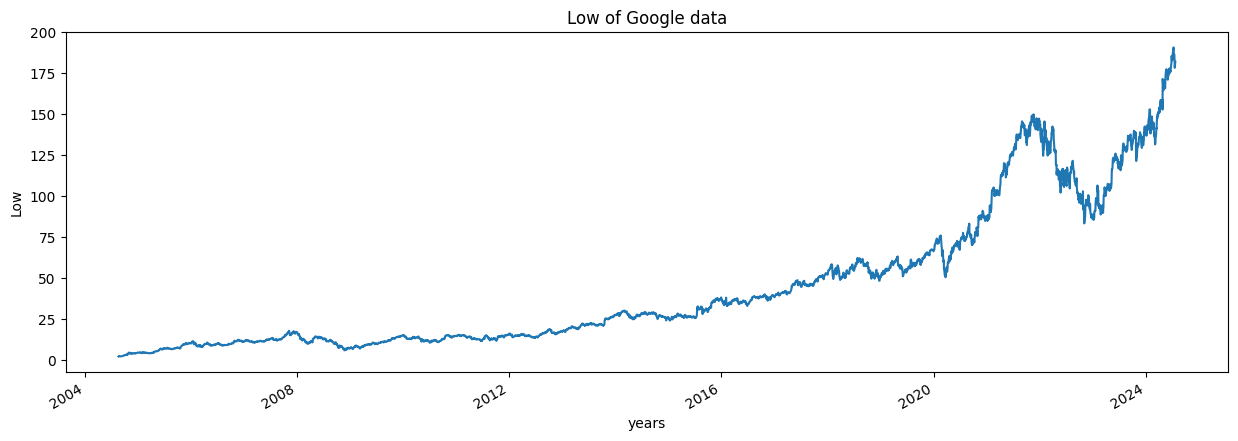

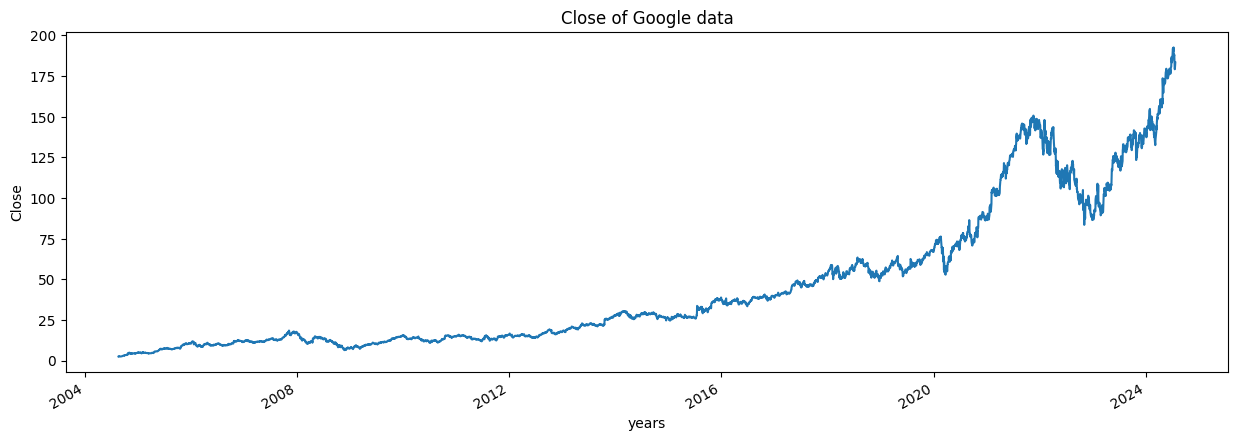

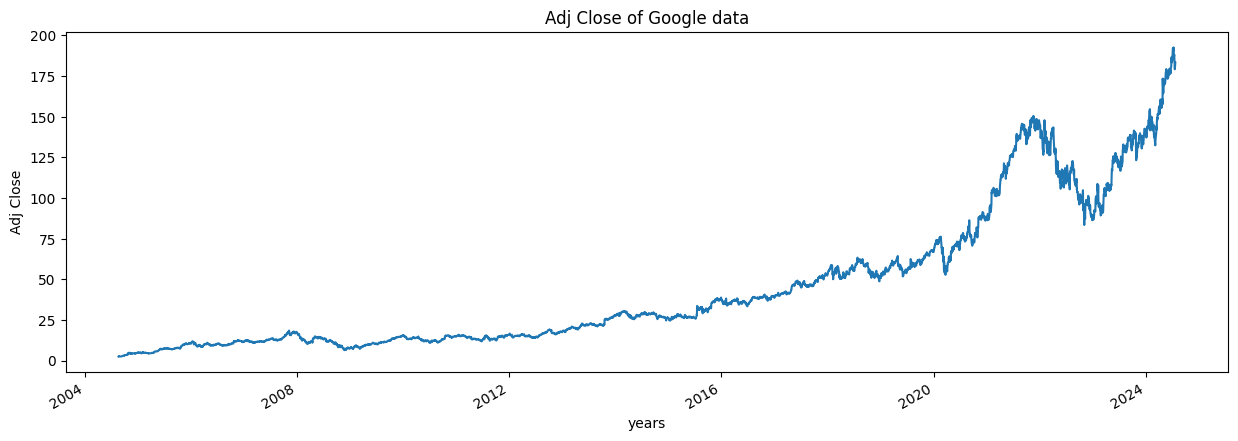

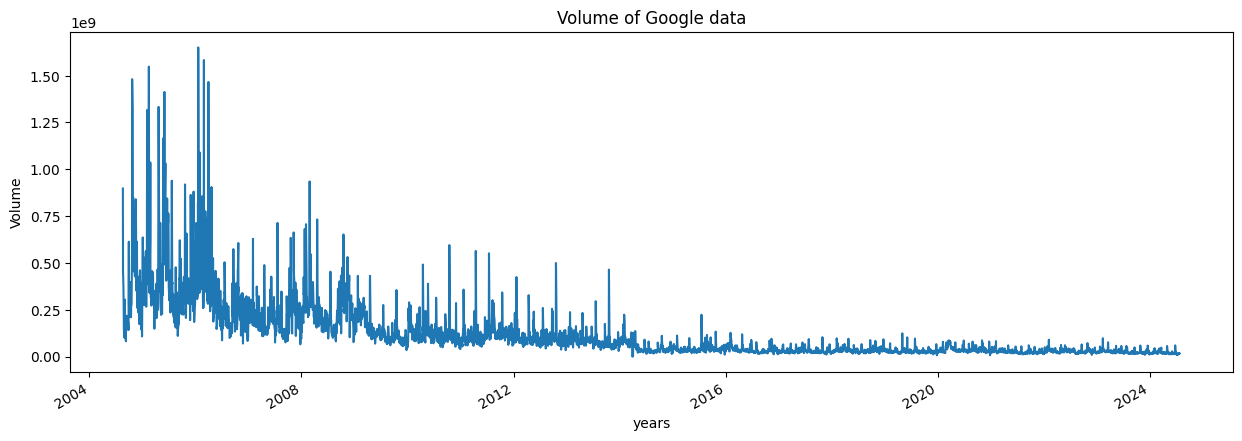

In [16]:
for column in google_data.columns:
  plot_graph((15,5), google_data[column], column)

example of moving average

In [ ]:
10,20,30,40,50,60,70,80,90,100

In [18]:
import pandas as pd
data = pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [19]:
data.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [21]:
for i in range(2004, 2025):
  print(i,list(google_data.index.year).count(i))

2004 94
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 139


In [23]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [25]:
google_data['MA_for_250_days'][0:250].tail()

Date
2005-08-09         NaN
2005-08-10         NaN
2005-08-11         NaN
2005-08-12         NaN
2005-08-15    5.028317
Name: MA_for_250_days, dtype: float64

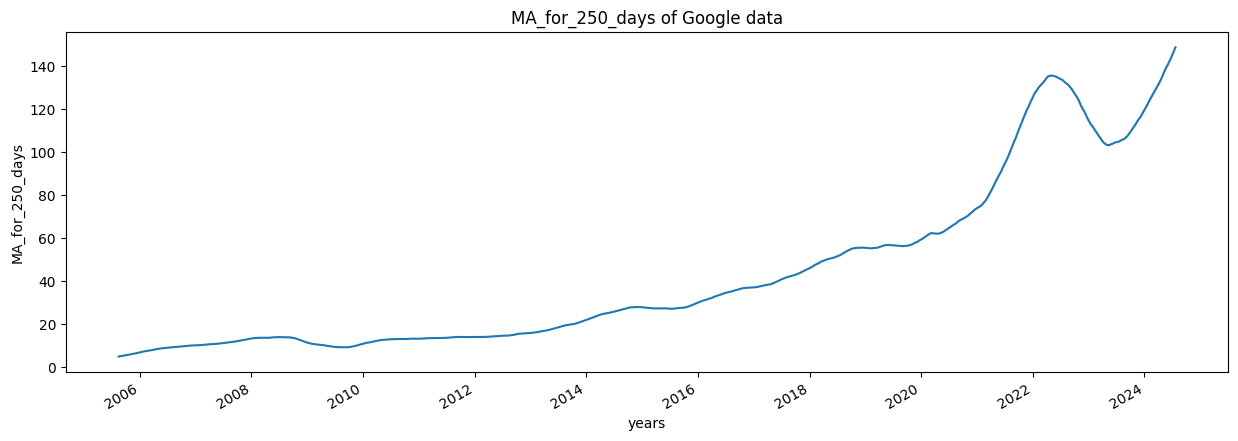

In [26]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 1500x500 with 0 Axes>

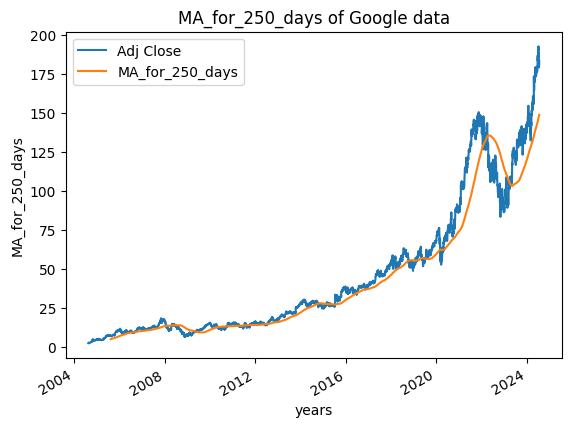

In [28]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

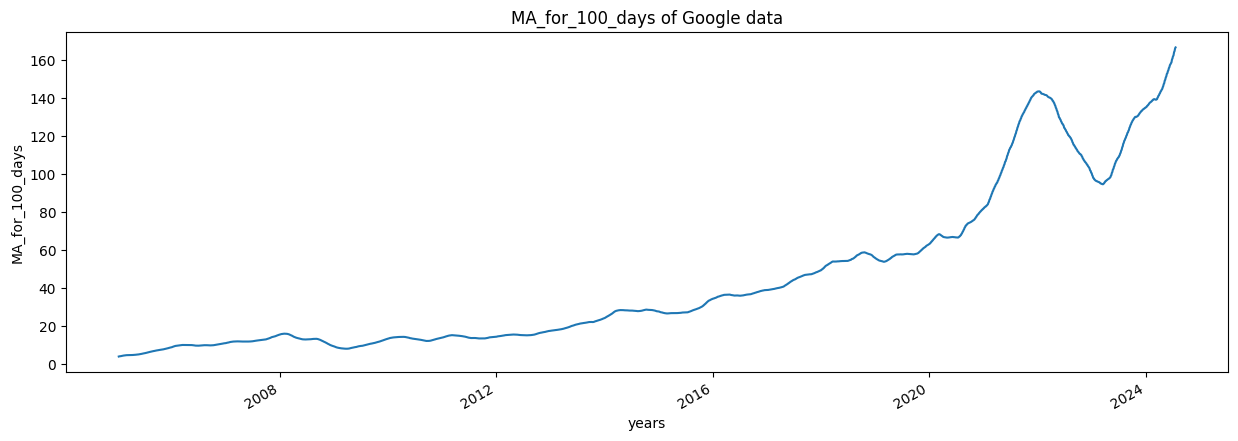

<Figure size 1500x500 with 0 Axes>

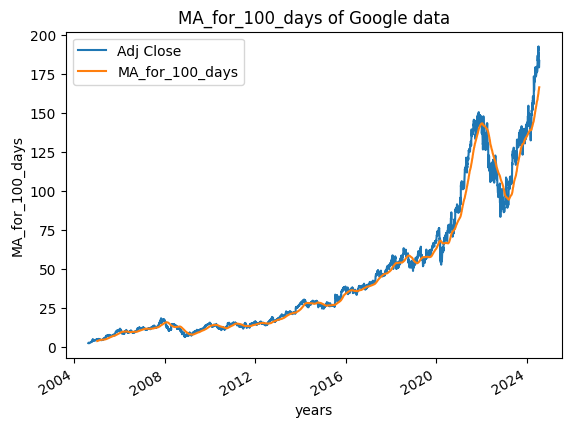

In [29]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data['MA_for_100_days'], 'MA_for_100_days')
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 1500x500 with 0 Axes>

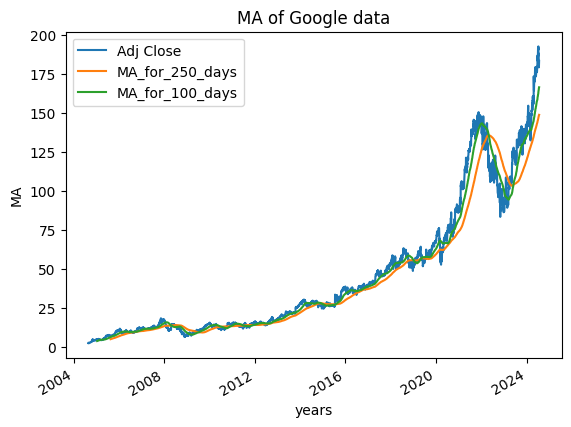

In [30]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days','MA_for_100_days']], 'MA')

In [31]:
google_data['Percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close', 'Percentage_change_cp']].head()

,Adj Close,Percentage_change_cp
Date,,
2004-08-19,2.496292,NaN
2004-08-20,2.694573,0.079430
2004-08-23,2.721690,0.010064
2004-08-24,2.608991,-0.041408
2004-08-25,2.637103,0.010775


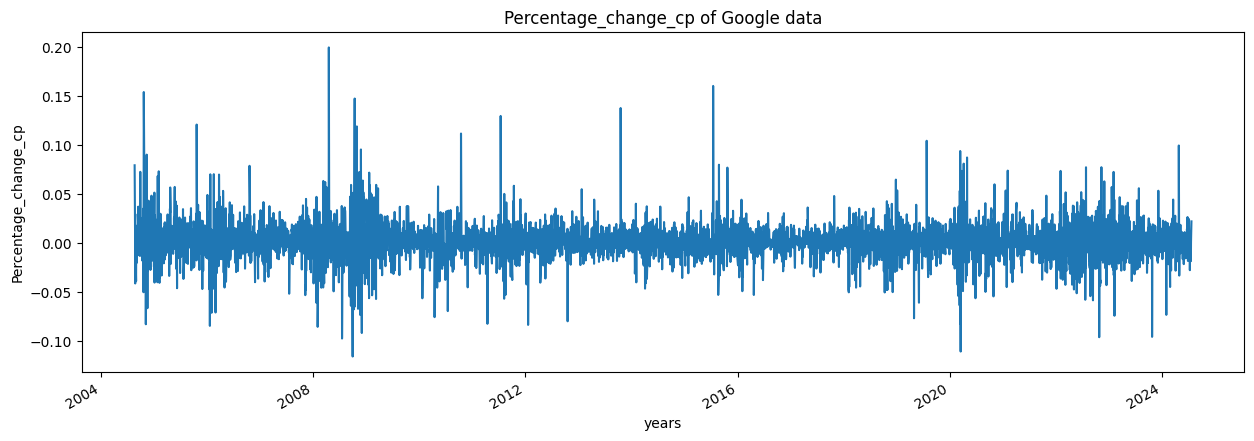

In [32]:
plot_graph((15,5), google_data['Percentage_change_cp'], 'Percentage_change_cp')

In [33]:
Adj_close_price = google_data[['Adj Close']]

In [34]:
max(Adj_close_price.values), min(Adj_close_price.values)

(array([192.66000366]), array([2.48808169]))

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[4.31749279e-05],
       [1.08581220e-03],
       [1.22840556e-03],
       ...,
       [9.29327094e-01],
       [9.30221012e-01],
       [9.51044311e-01]])

In [37]:
len(scaled_data)

5014

In [40]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
  x_data.append(scaled_data[i-100:i])
  y_data.append(scaled_data[i])

import numpy as np

x_data, y_data = np.array(x_data), np.array(y_data)


# x_data = np.reshape(x_data, (x_data.shape[0], x_data.shape[1], 1))

In [41]:
x_data[0], y_data[0]

(array([[4.31749279e-05],
        [1.08581220e-03],
        [1.22840556e-03],
        [6.35788989e-04],
        [7.83614035e-04],
        [1.03348276e-03],
        [8.03236951e-04],
        [2.61643473e-04],
        [3.08737468e-04],
        [3.13989218e-05],
        [1.96230411e-04],
        [0.00000000e+00],
        [2.05389945e-04],
        [2.99582949e-04],
        [3.00889305e-04],
        [6.95966599e-04],
        [9.79844446e-04],
        [1.50182002e-03],
        [1.56853693e-03],
        [1.82625131e-03],
        [2.28674167e-03],
        [2.53137368e-03],
        [2.33252680e-03],
        [2.40316654e-03],
        [2.72237366e-03],
        [2.59285890e-03],
        [2.38747397e-03],
        [3.51252574e-03],
        [4.06458761e-03],
        [3.87097242e-03],
        [4.26081802e-03],
        [4.58524931e-03],
        [5.01826483e-03],
        [4.84950926e-03],
        [5.08105766e-03],
        [4.93454147e-03],
        [4.61141654e-03],
        [4.89137156e-03],
        [5.3

In [42]:
int(len(x_data)*0.7)

3439